In [325]:
import pandas as pd
import matplotlib.pyplot as plt


import warnings
#suppress future warnings
warnings.simplefilter(action = "ignore", category = FutureWarning )

In [326]:
df = pd.read_csv("Amazon Sale Report.csv", index_col = "index",  low_memory=False)
pd.set_option('display.max_columns', None)
df.head(4)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,,,
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN


In [327]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Order ID,128975,120378,171-5057375-2831560,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,128975,91,05-03-22,2085,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Status,128975,13,Shipped,77804,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fulfilment,128975,2,Amazon,89698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales Channel,128975,2,Amazon.in,128851,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ship-service-level,128975,2,Expedited,88615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Style,128975,1377,JNE3797,4224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SKU,128975,7195,JNE3797-KR-L,773,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,128975,9,Set,50284,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,128975,11,M,22711,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning

This dataset provides detailed insights into Amazon sales data, including SKU Code, Design Number, Stock, Category, Size and Color, to help optimize product profitability

- Category: Type of product. (String)
- Size: Size of the product. (String)
- Date: Date of the sale. (Date)
- Status: Status of the sale. (String)
- Fulfilment: Method of fulfilment. (String)
- Style: Style of the product. (String)
- SKU: Stock Keeping Unit. (String)
- ASIN: Amazon Standard Identification Number. (String)
- Courier Status: Status of the courier. (String)
- Qty: Quantity of the product. (Integer)
- Amount: Amount of the sale. (Float)
- B2B: Business to business sale. (Boolean)
- Currency: The currency used for the sale. (String)

# Renaming DataFrame Columns

In [328]:
#renaming the df columns for clarity
df.rename(columns = {'ship-service-level' : 'Ship-Service-Level',
                      'SKU' : 'Stock Keeping Unit',
                      'ASIN' : 'Amazon Standard Identification Number',
                     'currency': 'Currency',
                      'ship-city': 'Ship-City',
                      'ship-state': 'Ship-State',
                      'ship-postal-code' : 'Ship-Postal-Code',
                     'ship-country' : 'Ship-Country',
                      'promotion-ids': 'Promotion-ids',
                     'fulfilled-by' : 'Fulfilled-by'}, inplace = True)

## 1.  Dealing with `Courier Status` Column

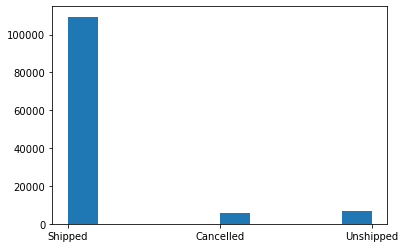

In [329]:
df["Courier Status"].hist(grid = False)
plt.show()

In [330]:
#to get the count of each unique value in the "courier status" column
df["Courier Status"].value_counts()

Shipped      109487
Unshipped      6681
Cancelled      5935
Name: Courier Status, dtype: int64

In [331]:
#null values count
null_values = df["Courier Status"].isna().sum()
null_values 

6872

This column is categorical so its best to replace the null values with its mode, i.e the most frequently occurring value.

In [332]:
#filling the null with mode value
df["Courier Status"] = df["Courier Status"].fillna(df["Courier Status"].mode()[0])

#count of the filled values
filled_count = df["Courier Status"].count()


#asserting that there are no null values in the "Courier Status" column
assert df["Courier Status"].isnull().sum() == 0, "Null values still exist"


print(f"Filled values count: {filled_count}")
print("Assertion passed: no null values in the 'Courier Status' column")

Filled values count: 128975
Assertion passed: no null values in the 'Courier Status' column


  ## 2.  Dealing with `Currency` Column

In [333]:
#to get the count of the null values in the "currency" column
print(df["Currency"].isna().sum())


#filling the null with mode value
df["Currency"] = df["Currency"].fillna("INR")

7795


In [334]:
#aserting that there are no null values in the "currency" column
assert df["Currency"].isnull().sum() == 0, "null values still exist in the 'Currency' column"

## 3.  Dealing with `Amount` Column

- In the dataset, the "Amount" column contains null values in cases where the Quantity ordered is zero. It is logical to fill these null values with zero, as it signifies that no quantity was ordered, resulting in no associated amount.

In [335]:
#to get the count of the null values in the "amount" column
print(df["Amount"].isna().sum())

7795


In [336]:
#filling the null with mode value
df["Amount"] = df["Amount"].fillna(0)

#aserting that there are no null values in the "amount" column
assert df["Amount"].isnull().sum() == 0, "null values still exist in the 'Amount' column"

## 4.  Dealing with `Ship-City`, `Ship-State`, `Ship-Postal-Code` and `Ship-Country` Columns

- Filling and Syncing the Missing Shipping Information

In [337]:
#"""locating the ship-city with "null values" to see if there's a correlation with Ship-Postal-Code and Ship-Country Columns
df.loc[df["Ship-City"].isnull(), "Ship-City":"Ship-Country"].head(6)

,Ship-City,Ship-State,Ship-Postal-Code,Ship-Country
index,,,,
1871,NaN,NaN,NaN,NaN
1872,NaN,NaN,NaN,NaN
8752,NaN,NaN,NaN,NaN
11215,NaN,NaN,NaN,NaN
13252,NaN,NaN,NaN,NaN
15688,NaN,NaN,NaN,NaN


In [338]:
#confirming the ship city with the top counts
df["Ship-City"].value_counts().head()

BENGALURU    11217
HYDERABAD     8074
MUMBAI        6126
NEW DELHI     5795
CHENNAI       5421
Name: Ship-City, dtype: int64

In [339]:
#so to find the mode of the "Ship-City" column since its a categorical column
ship_city_mode = df["Ship-City"].mode()[0]

#filling "ship-city" null values with mode value
df["Ship-City"].fillna(ship_city_mode, inplace = True)

#filling the related columns with the mode value
df["Ship-State"].fillna(df["Ship-State"].mode()[0], inplace = True)
df["Ship-Postal-Code"].fillna(df["Ship-Postal-Code"].mode()[0], inplace = True)
df["Ship-Country"].fillna(df["Ship-Country"].mode()[0], inplace = True)

In [340]:
#to assert that there are no more null values in the specified columns after filling them
assert df["Ship-City"].isnull().sum() == 0, "null values still exist in Ship City column"
assert df["Ship-State"].isnull().sum() == 0, "null values still exist in Ship State column"
assert df["Ship-Postal-Code"].isnull().sum() == 0, "null values still exist in Ship Postal Code column"
assert df["Ship-Country"].isnull().sum() == 0, "null values still exist in Ship Country column"

## 5.  Dealing with `Promotion-ids` Column

In [341]:
#to get the count of the null values in the "Promotion-ids" column
print(df["Promotion-ids"].isna().sum())


#filling the null with mode value
df["Promotion-ids"] = df["Promotion-ids"].fillna(df["Promotion-ids"].mode()[0])

49153


In [342]:
#aserting that there are no null values in the "Promotion-ids" column
assert df["Promotion-ids"].isnull().sum() == 0, "null values still exist in the 'Promotion-ids' column"

In [343]:
print(df["Promotion-ids"].isna().sum())

0


## 6.  Dealing with `Fulfilled-by` Column

In [344]:
#to get the count of each unique value in the "fulfilled-by" column
df["Fulfilled-by"].value_counts()

Easy Ship    39277
Name: Fulfilled-by, dtype: int64

In [345]:
#to get the count of the null values in the "fulfilled-by" column
print(df["Fulfilled-by"].isna().sum())


#filling the null with mode value
df["Fulfilled-by"] = df["Fulfilled-by"].fillna("Easy Ship")

89698


In [346]:
#aserting that there are no null values in the "fulfilled-by" column
assert df["Fulfilled-by"].isnull().sum() == 0, "null values still exist in the 'Fulfilled-by' column"

## 7.  Dealing with `Ordered Date` Column

In [347]:
#converting the ordered date datatype to datetime 
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%Y-%m-%d')


#converting the ordered date datatype from string to datetime
df["Date"] = df["Date"].astype('datetime64[ns]')

In [348]:
#extracting the year, month and date 
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day

In [349]:
df["Month"].value_counts()

4    49067
5    42040
6    37697
3      171
Name: Month, dtype: int64

## 8.  Removing Unnamed Column from the Dataset

In [350]:
#dropping "Unnamed: 22" 
df = df.drop(["Unnamed: 22"], axis = 1)

In [ ]:
#saving the cleaned csv file
df.to_csv("Amazon Sale Report_2.csv")